**Project_1**

Hypotheses drawn from the data set 'Attack':

- There is a positive correlation between frequency of shark attacks and time
- Most agressive species of shark is the Great White Shark and the most deadly species is also the Great White Shark
- There is a higher liklyhood of attack whilst surfing than swimming

In [147]:
import pandas as pd

data = pd.read_csv('attacks.csv', encoding= 'unicode_escape')
len(data)

25723

**Data Cleaning & Wrangling:**

In [148]:
#check and show the data that has duplicate rows:
print('total duplicated rows removed =', data.duplicated().sum())    #this is a data set of 25,000+ and 19,000+ rows are duplicates
#majority of the values are null and therefore we will remove the duplicate data in the code below:
data2 = data.drop_duplicates(inplace=False)
data2.isnull().sum()     #can see here that after removing the duplicates, there is still null/NAN values present


#removing all null or NAN values from 'Country', 'Species' and 'Activity' since my hypotheses are based on these vaiables
#removing rows with null or NAN values in 'date' and 'year' columns, since these are defining variables for accurate and valid data
data3 = data2.dropna(subset=["Country", "Date", "Year", "Species ", "Activity"])


#now the data is cleaned from 25,000 to 3,200 rows I will remove columns that contain duplicates,
#null values or are not integral to the data manipulation or hypotheses.
data4 = data3.drop(columns=["href formula", "Name", "Case Number.2", "Case Number.1", "Injury", "pdf", "href", "Investigator or Source", "Location", "Time", "Unnamed: 22", "Unnamed: 23"])

def speciesshark (x):
    ''' This function searches for keywords and returns the species'''
    x=str(x).lower()
    if 'white' in x:
        return 'white shark'
    elif 'tiger' in x:                       #cleaning data in 'Species' column since there were inaccurate recordings and we can group to a few species of shark
        return 'tiger shark'
    elif 'bull' in x:
        return 'bull shark'
    elif 'wobbegong'in x:
        return 'wobbegong shark'
    elif 'ham' in x:
        return 'hammerhead shark'
    elif 'confirma' in x or 'invalid' in x or 'quest' in x:
        return'no shark involved'
    
    else:
        return 'species not confirmed'
def activities (x):
    ''' This function receives a field, it searchs for different key words and returns the group it belongs'''
    string = str(x).lower()
    if 'swim' in string or 'bath' in string or 'div' in string or 'snork' in string or 'feed' in string or 'wading' in string or 'shark' in string or 'air' in string or 'wash' in string or 'walk' in string or 'floa' in string or 'tread' in string or 'water' in string or 'play' in string:
        return 'swiming'
    elif 'surf'  in string or 'board' in string:
        return 'surfing'                                #cleaning data in 'Activity' column since there were inaccurate recordings and we can group to a few activities
    elif 'fish' in string or 'stan' in string:
        return 'fishing'
    elif 'ship' in string or 'boat' in string or 'sail' in string or 'kaya' in string or 'cano' in string or 'adrift' in string or 'pad' in string or 'sunk' in string or 'yatch' in string or 'yacht' in string or 'row'in string or 'sink' in string or 'sea' in string or 'fell' in string or 'fall' in string:
        return 'sailing'
    else:
        return 'others'
#def fatalattack (x):
    ''' This function looks for the exact match of the letters Y and N'''
    x=str(x).upper()
    match = re.match(r"(^[N,Y]$)",x)
    if match:
        fatalstr = (match.group(1))
        return fatalstr
    else:
        return 'unknown'


data4['Species '] = data4['Species '].apply(speciesshark)
data4['Activity'] = data4['Activity'].apply(activities)


is_not_shark_related = data4[data4['Species ']!='no shark involved']   #filterd out rows where sharks are not involved or the species is unknown
only_species_known = is_not_shark_related[is_not_shark_related['Species ']!='species not confirmed'] 

#after removing rows of null values the index is now incorrect
#code to reset index:
only_species_known.reset_index(inplace=True)
data5 = only_species_known.drop(columns=['index'])

total duplicated rows removed = 19411


**Data Manipulation:**

In [149]:
#MOST AGRESSIVE SHARK:
print(data5['Species '].value_counts().idxmax())


#MOST DEADLY SHARK:
data5.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True, errors='raise')
attacks_only_fatal = data5[data5.Fatal != 'N']
print(attacks_only_fatal['Species '].value_counts().idxmax())
#most deadly shark is unknown.


#MOST DEADLY SHARK IN YEAR 2018:
data_only_2018 = data5[data5.Year >2017]
attacks_only_fatal = data_only_2018[data_only_2018.Fatal != 'N']
print(attacks_only_fatal['Species '].value_counts().idxmax())

white shark
white shark
tiger shark


In [151]:
data_yes = data5[data5["Fatal"] == "Y"]
data_no = data5[data5["Fatal"] == "N"]

#.crosstab

data_merged = pd.merge(data_yes, data_no, how='outer')

data_probability = data_merged.groupby(['Activity'], ['Fatal'])


#  surfing_fatal / surfing_not_fatal = 47/306 = 0.2
#  swimming_fatal / surfing_not_fatal = 155/338 = 0.5

#  0.5/0.2 = 2.5x more likly to recive a fatal attack whilst swimming than surfing

data_probability

TypeError: unhashable type: 'list'

In [152]:
data5['Activity'].value_counts

<bound method IndexOpsMixin.value_counts of 0       sailing
1       swiming
2       swiming
3       swiming
4       swiming
         ...   
1175    swiming
1176    swiming
1177    swiming
1178    fishing
1179    fishing
Name: Activity, Length: 1180, dtype: object>

In [153]:
#PERCENTAGE OF ATTACKS WHILST SURFING:
probability_surfing_attack = 591/3192
print('PERCENTAGE OF ATTACKS WHILST SURFING: ', round(probability_surfing_attack*100), '%')

#PERCENTAGE OF ATTACKS WHILST SWIMMING:
probability_swimming_attack = 404/3192   
print('PERCENTAGE OF ATTACKS WHILST SWIMMING:', round(probability_swimming_attack*100), '%')

#PERCENTAGE OF ATTACKS WHILST KITESURFING:
probability_kitesurfing_attack = 1/3192 
print('PERCENTAGE OF ATTACKS WHILST KITESURFING:', round(probability_kitesurfing_attack*100, 2), '%')

PERCENTAGE OF ATTACKS WHILST SURFING:  19 %
PERCENTAGE OF ATTACKS WHILST SWIMMING: 13 %
PERCENTAGE OF ATTACKS WHILST KITESURFING: 0.03 %


**Plots:**

In [ ]:
#notes:
#histogram - shark attacks against time
# box plot
# distplot for SD
#pie chart - most agressive shark
# line chart or histogram for probability of fatal attack whilst ...

In [154]:
#PLOT TO SHOW THE RELATIONSHIP BETWEEN TIME AND FREQUENCY OF ATTACKS:

import numpy as np
import seaborn as sns
import plotly.express as px


In [158]:
#Histagram to show the positive correlation between 'Time' and 'Frequency of Attacks':
data_plot1 = data5[data5['Year'] > 1900]
fig = px.histogram(x=list(data_plot1['Year'].value_counts().index), y=list(data_plot1['Year'].value_counts().values), nbins = 100,) 
fig.show()

<AxesSubplot: ylabel='Activity'>

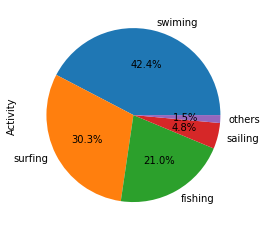

In [ ]:
#Pie chart to show the attacks during activities.
#most occur whilst swimming (42.4%).

data_probability = data_merged['Activity'].value_counts()
data_probability.plot.pie(autopct="%.1f%%")